In [82]:
import os, glob
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import myutil.myutil as util

from evo.core import metrics
import evo.core.sync as sync
import evo.core.trajectory as evotraj

# Time to start considering the estimate
test_start = 4.9

# log_path = '/media/tmn/mySataSSD1/Experiments/gptr/logs/lio/sim_cloud_avia_mid_dynamic_extrinsics/'
gtr_path = '/media/tmn/mySataSSD1/Experiments/gptr/cloud_avia_mid_dynamic_extrinsics/gtr/'

# The path to the experiment log
xtrz_log = '/media/tmn/mySataSSD1/Experiments/gptr/logs/lio/sim_exp/sim_cloud_avia_mid_dynamic_extrinsics_gptr_two_lidar/run_00/time_0030/extrinsics_1.csv'

# The path to the trajectories
traj_est_logs = ['/media/tmn/mySataSSD1/Experiments/gptr/logs/lio/sim_exp/sim_cloud_avia_mid_dynamic_extrinsics_gptr_two_lidar/run_00/time_0030/gptraj_0.csv',
                 '/media/tmn/mySataSSD1/Experiments/gptr/logs/lio/sim_exp/sim_cloud_avia_mid_dynamic_extrinsics_gptr_two_lidar/run_00/time_0030/gptraj_1.csv']

traj_est1lidar_logs = ['/media/tmn/mySataSSD1/Experiments/gptr/logs/lio/sim_exp/sim_cloud_avia_mid_dynamic_extrinsics_gptr_lidar0/run_00/time_0030/gptraj_0.csv',
                       '/media/tmn/mySataSSD1/Experiments/gptr/logs/lio/sim_exp/sim_cloud_avia_mid_dynamic_extrinsics_gptr_lidar1/run_00/time_0030/gptraj_0.csv']

traj_estkf_logs = ['/media/tmn/mySataSSD1/Experiments/gptr/logs/lio/sim_exp/sim_cloud_avia_mid_dynamic_extrinsics_i2ekf/lidar_0_pose.pcd',
                   '/media/tmn/mySataSSD1/Experiments/gptr/logs/lio/sim_exp/sim_cloud_avia_mid_dynamic_extrinsics_i2ekf/lidar_1_pose.pcd']

traj_trajlo_logs = ['/media/tmn/mySataSSD1/Experiments/gptr/logs/lio/sim_exp/sim_cloud_avia_mid_dynamic_extrinsics_trajlo/lidar0_estimated_pose.txt',
                    '/media/tmn/mySataSSD1/Experiments/gptr/logs/lio/sim_exp/sim_cloud_avia_mid_dynamic_extrinsics_trajlo/lidar1_estimated_pose.txt']

# Trajectory groundtruth error
traj_gtr_logs = [gtr_path + '/lidar_0_gtr.pcd',
                 gtr_path + '/lidar_1_gtr.pcd']

# Lidar extrinsic
pose_B_L = [np.array([0,  45, 0,  0,   0,  0]),
            np.array([180, 0, 0, -0.5, 0, -0.25])]
T_B_L = []
for pose in pose_B_L:
	T = np.identity(4)
	T[0:3, 0:3] = util.eul2rotm(pose[0]/180*np.pi, pose[1]/180*np.pi, pose[2]/180*np.pi)
	T[0:3, 3] = pose[3:].T
	T_B_L.append(T)
	print("quat_B_L", util.rotm2quat(T[0:3, 0:3]))

T_L0_L1 = util.tfmult(util.tfinv(T_B_L[0]), T_B_L[1])
Rot01 = T_L0_L1[0:3, 0:3]
Pos01 = T_L0_L1[0:3, 3]
Eul01 = np.array(util.rotm2eul(Rot01))/math.pi*180
Qua01 = np.array(util.rotm2quat(Rot01))
print("xyz", Pos01)
print("ypr", Eul01)


# Lidar extrinsic slip
pose_B_L_slip = [np.array([0,  45, 0,  0,   0,  0]),
                 np.array([180, 0, 0, -0.5, 0, -0.35])]
T_B_L_slip = []
for pose in pose_B_L_slip:
	T_slip = np.identity(4)
	T_slip[0:3, 0:3] = util.eul2rotm(pose[0]/180*np.pi, pose[1]/180*np.pi, pose[2]/180*np.pi)
	T_slip[0:3, 3] = pose[3:].T
	T_B_L_slip.append(T_slip)

T_L0_L1_slip = util.tfmult(util.tfinv(T_B_L_slip[0]), T_B_L_slip[1])
Rot01_slip = T_L0_L1_slip[0:3, 0:3]
Pos01_slip = T_L0_L1_slip[0:3, 3]
Eul01_slip = np.array(util.rotm2eul(Rot01_slip))/math.pi*180
Qua01_slip = np.array(util.rotm2quat(Rot01_slip))
print("xyz", Pos01_slip)
print("ypr", Eul01_slip)


# pose_W_L = [np.array([ 43,  48, 0,  0,    0,   0.70]),
#             np.array([-134, 0,  0, -0.3, -0.3, 0.55])]
# T_W_L = []
# for pose in pose_W_L:
# 	T = np.identity(4)
# 	T[0:3, 0:3] = util.eul2rotm(pose[0]/180*np.pi, pose[1]/180*np.pi, pose[2]/180*np.pi)
# 	T[0:3, 3] = pose[3:].T
# 	T_W_L.append(T)
# T_L0_L1_init = util.tfmult(util.tfinv(T_W_L[0]), T_W_L[1])
# Rot01_init = T_L0_L1_init[0:3, 0:3]
# Pos01_init = T_L0_L1_init[0:3, 3]
# Eul01_init = np.array(util.rotm2eul(Rot01_init))/math.pi*180
# Qua01_init = np.array(util.rotm2quat(Rot01_init))
# print("xyz_init", Pos01_init)
# print("ypr_init", Eul01_init)

# print("xyz_init_error", Pos01_init - Pos01)
# print("ypr_init_error", Eul01_init - Eul01)

quat_B_L [ 0.92387953 -0.          0.38268343 -0.        ]
quat_B_L [6.123234e-17 0.000000e+00 0.000000e+00 1.000000e+00]
xyz [-0.1767767   0.         -0.53033009]
ypr [ 1.8000000e+02  4.5000000e+01 -7.0167093e-15]
xyz [-0.10606602  0.         -0.60104076]
ypr [ 1.8000000e+02  4.5000000e+01 -7.0167093e-15]


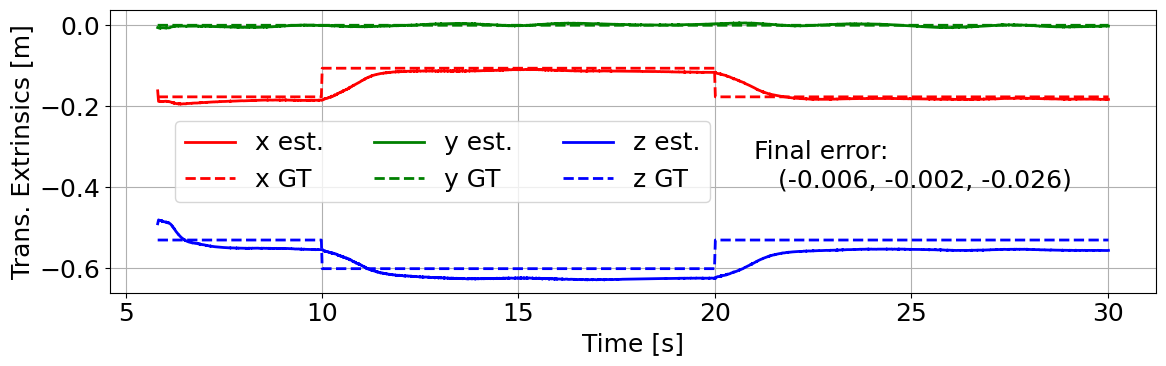

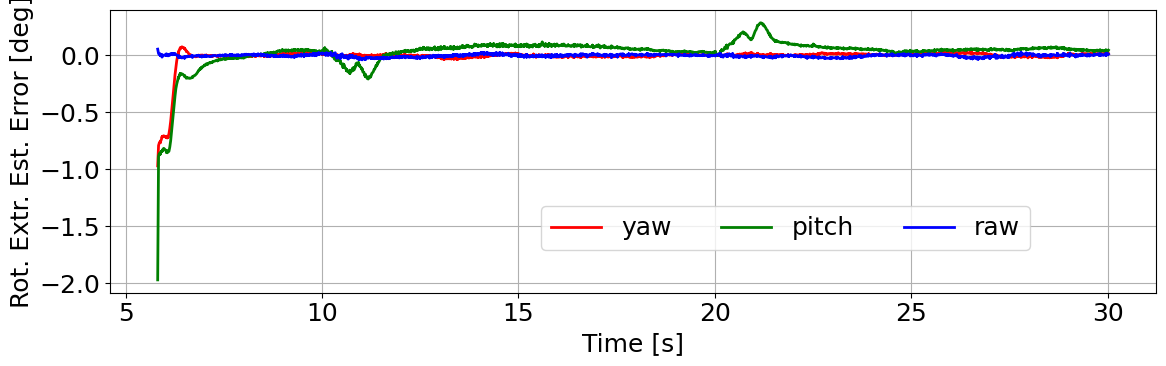

In [83]:
# Load the extrinsic data
xtrz_data = np.loadtxt(xtrz_log, delimiter=',', skiprows=1)
txtrz = xtrz_data[:, 0]

# Calculate the position data
p_L0_L1_est = xtrz_data[:, 1:4]
p_L0_L1_err = np.zeros(p_L0_L1_est.shape)
p_L0_L1_gtr = np.zeros(p_L0_L1_est.shape)
for idx, t in enumerate(txtrz):
    if 10 < t < 20:
        p_L0_L1_gtr[idx, :] = p_L0_L1_est[idx, :] - Pos01_slip
        p_L0_L1_gtr[idx, :] = Pos01_slip
    else:
        p_L0_L1_err[idx, :] = p_L0_L1_est[idx, :] - Pos01
        p_L0_L1_gtr[idx, :] = Pos01

# Calculate the oritation error
Q_L0_L1_est = []
E_L0_L1_est = []
E_L0_L1_err = []
for idx, t in enumerate(txtrz):
    q = xtrz_data[idx, [7, 4, 5, 6]]
    Q_L0_L1_est.append(util.quat2rotm(q))
    E_L0_L1_est.append(list(util.quat2eul(q)))
    E_L0_L1_err.append(list(util.rotm2eul(Q_L0_L1_est[-1].transpose()@Rot01)))

E_L0_L1_est = np.array(E_L0_L1_est).reshape((-1, 3))
E_L0_L1_err = np.array(E_L0_L1_err).reshape((-1, 3))

# Plot the error
plt.rcParams.update({'font.size':18})
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))

ax.plot(txtrz, p_L0_L1_est[:, 0], linewidth=2, color='r', label='x est.')
ax.plot(txtrz, p_L0_L1_gtr[:, 0], linewidth=2, color='r', label='x GT', linestyle='--')

ax.plot(txtrz, p_L0_L1_est[:, 1], linewidth=2, color='g', label='y est.')
ax.plot(txtrz, p_L0_L1_gtr[:, 1], linewidth=2, color='g', label='y GT', linestyle='--')

ax.plot(txtrz, p_L0_L1_est[:, 2], linewidth=2, color='b', label='z est.')
ax.plot(txtrz, p_L0_L1_gtr[:, 2], linewidth=2, color='b', label='z GT', linestyle='--')

ax.text(s=f'Final error: \n   ({p_L0_L1_err[-1, 0]:.3f}, {p_L0_L1_err[-1, 1]:.3f}, {p_L0_L1_err[-1, 2]:.3f})', x=21, y=-0.4)

# ax.set_xlim([5, 15])
ax.grid('on')
ax.legend(ncol=3, loc='upper left', bbox_to_anchor=(0.05, 0.65))

ax.set_xlabel('Time [s]')
ax.set_ylabel('Trans. Extrinsics [m]')
plt.tight_layout()
fig.savefig('trans_extrinsics_error.jpg')

# Plot the error
plt.rcParams.update({'font.size':18})
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))

ax.plot(txtrz, E_L0_L1_err[:, 0]/np.pi*180, linewidth=2, color='r', label='yaw')
ax.plot(txtrz, E_L0_L1_err[:, 1]/np.pi*180, linewidth=2, color='g', label='pitch')
ax.plot(txtrz, E_L0_L1_err[:, 2]/np.pi*180, linewidth=2, color='b', label='raw')

ax.grid('on')
ax.legend(ncol=3, bbox_to_anchor=(0.4, 0.35))

ax.set_xlabel('Time [s]')
ax.set_ylabel('Rot. Extr. Est. Error [deg]')

plt.tight_layout()
fig.savefig('rot_extrinsics_error.jpg')

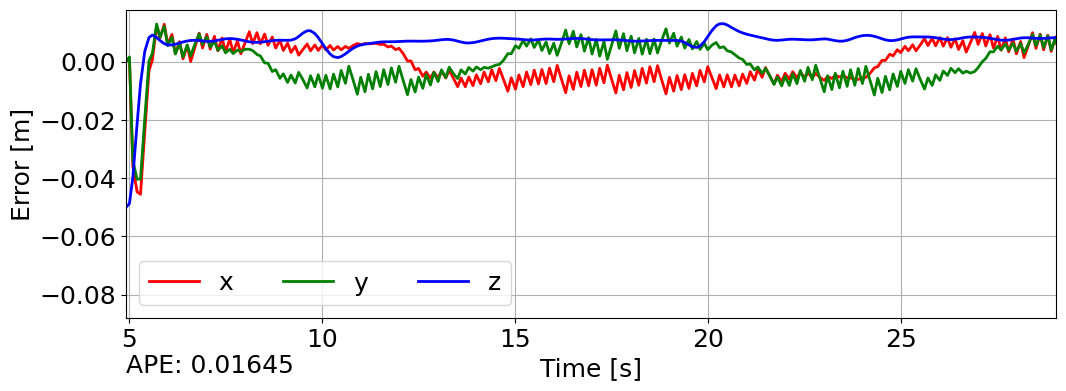

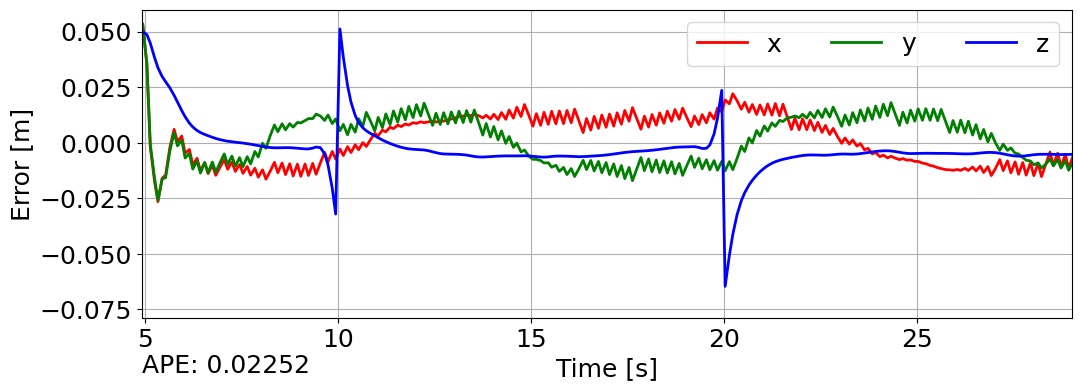

In [84]:
# Calculate the ATE
def calculate_metric(traj_gtr, traj_est):
    metric = metrics.APE(pose_relation=metrics.PoseRelation.translation_part)
    metric.process_data((traj_gtr, traj_est))
    return float(metric.get_result(ref_name='reference', est_name='estimate').stats['rmse'])

# Load the trajectory
traj_est_data = []
for log in traj_est_logs:
    traj_est_data.append(np.loadtxt(log, delimiter=',', skiprows=1))

traj_gtr_data = []
for log in traj_gtr_logs:
    traj_gtr_data.append(np.loadtxt(log, delimiter=' ', skiprows=11))

for lidx in range(len(traj_est_data)):
    
    # Get the traj_est
    traj_est = traj_est_data[lidx]
    tidx = list(np.where(traj_est[:, 1] > test_start)[0])
    traj_est = evotraj.PoseTrajectory3D(positions_xyz=traj_est[tidx, :][:, [12, 13, 14]], orientations_quat_wxyz=traj_est[tidx, :][:, [5, 2, 3, 4]], timestamps=traj_est[tidx, 1])

    # Get the traj gtr
    traj_gtr = traj_gtr_data[lidx]
    traj_gtr = evotraj.PoseTrajectory3D(positions_xyz=traj_gtr[:, 0:3], orientations_quat_wxyz=traj_gtr[:, [8, 5, 6, 7]], timestamps=traj_gtr[:, 3])

    traj_est, traj_gtr = sync.associate_trajectories(traj_est, traj_gtr, max_diff=0.2)
    traj_err = evotraj.PoseTrajectory3D(positions_xyz=traj_est.positions_xyz - traj_gtr.positions_xyz, \
                                        orientations_quat_wxyz=traj_est.orientations_quat_wxyz, timestamps=traj_est.timestamps)
    
    # Find the RMSE
    rmse = calculate_metric(traj_est, traj_gtr)
    
    plt.rcParams.update({'font.size':18})
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 0], 'r', linewidth=2, label='x')
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 1], 'g', linewidth=2, label='y')
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 2], 'b', linewidth=2, label='z')

    # Stamp the ATE
    ax.text(0, -0.18, f'APE: {rmse:.5f}', transform=ax.transAxes)

    ax.set_xlim([np.min(traj_est.timestamps), np.max(traj_est.timestamps-1.0)])
    # ax.set_ylim([-0.06, 0.06])
    ax.legend(ncols=3)
    ax.grid('on')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Error [m]')


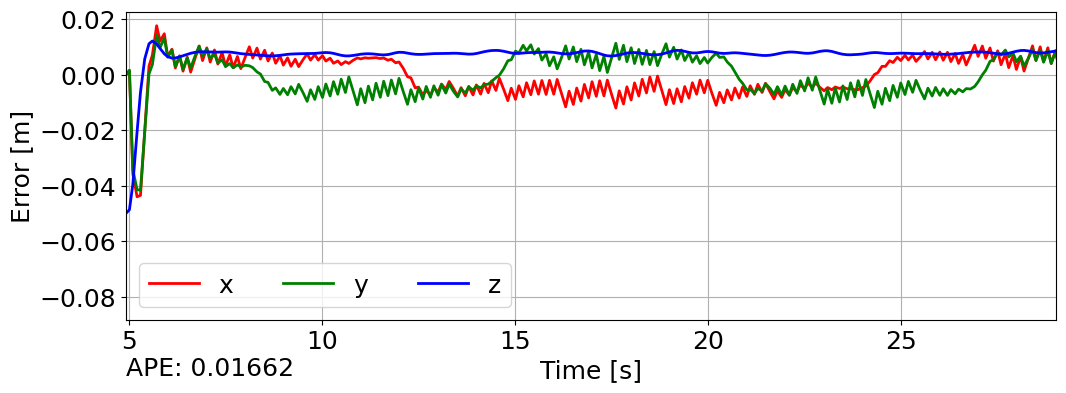

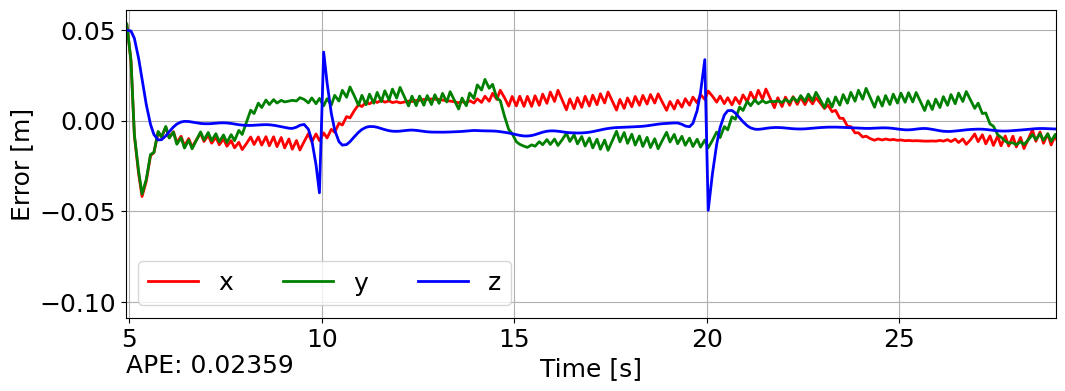

In [85]:
# Load the trajectory
traj_est1lidar_data = []
for log in traj_est1lidar_logs:
    traj_est1lidar_data.append(np.loadtxt(log, delimiter=',', skiprows=1))

traj_gtr_data = []
for log in traj_gtr_logs:
    traj_gtr_data.append(np.loadtxt(log, delimiter=' ', skiprows=11))

for lidx in range(len(traj_est1lidar_data)):
    
    # Get the traj_est
    traj_est1lidar = traj_est1lidar_data[lidx]
    tidx = list(np.where(traj_est1lidar[:, 1] > test_start)[0])
    traj_est1lidar = evotraj.PoseTrajectory3D(positions_xyz=traj_est1lidar[tidx, :][:, [12, 13, 14]], orientations_quat_wxyz=traj_est1lidar[tidx, :][:, [5, 2, 3, 4]], timestamps=traj_est1lidar[tidx, 1])

    # Get the traj gtr
    traj_gtr = traj_gtr_data[lidx]
    traj_gtr = evotraj.PoseTrajectory3D(positions_xyz=traj_gtr[:, 0:3], orientations_quat_wxyz=traj_gtr[:, [8, 5, 6, 7]], timestamps=traj_gtr[:, 3])

    traj_est1lidar, traj_gtr = sync.associate_trajectories(traj_est1lidar, traj_gtr, max_diff=0.2)
    traj_err = evotraj.PoseTrajectory3D(positions_xyz=traj_est1lidar.positions_xyz - traj_gtr.positions_xyz, \
                                        orientations_quat_wxyz=traj_est1lidar.orientations_quat_wxyz, timestamps=traj_est1lidar.timestamps)
    
    # Find the RMSE
    rmse = calculate_metric(traj_est1lidar, traj_gtr)
    
    plt.rcParams.update({'font.size':18})
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 0], 'r', linewidth=2, label='x')
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 1], 'g', linewidth=2, label='y')
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 2], 'b', linewidth=2, label='z')

    # Stamp the ATE
    ax.text(0, -0.18, f'APE: {rmse:.5f}', transform=ax.transAxes)

    ax.set_xlim([np.min(traj_est1lidar.timestamps), np.max(traj_est1lidar.timestamps-1.0)])
    # ax.set_ylim([-0.06, 0.06])
    ax.legend(ncols=3)
    ax.grid('on')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Error [m]')


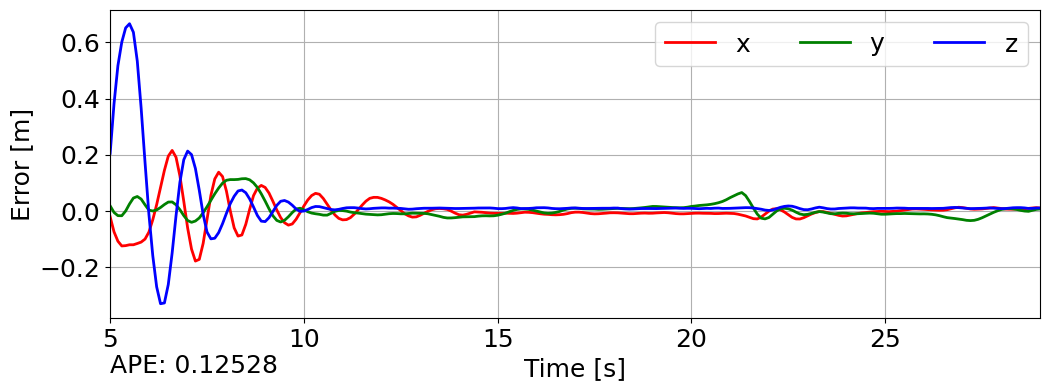

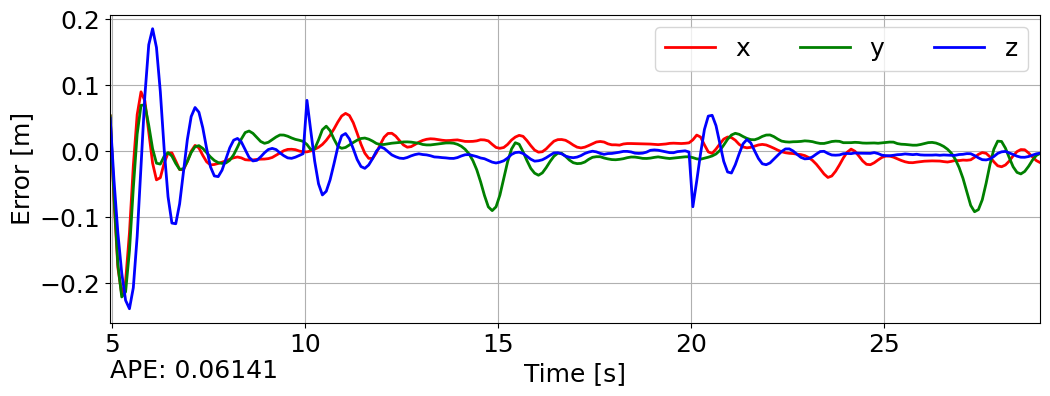

In [86]:
# Load the trajectory
traj_estkf_data = []
for log in traj_estkf_logs:
    traj_estkf_data.append(np.loadtxt(log, delimiter=' ', skiprows=11))

traj_gtr_data = []
for log in traj_gtr_logs:
    traj_gtr_data.append(np.loadtxt(log, delimiter=' ', skiprows=11))

for lidx in range(len(traj_estkf_data)):
    
    # Get the traj_estkf
    traj_estkf = traj_estkf_data[lidx]
    tidx = list(np.where(traj_estkf[:, 4] > test_start)[0])
    traj_estkf = evotraj.PoseTrajectory3D(positions_xyz=traj_estkf[tidx, :][:, [0, 1, 2]], orientations_quat_wxyz=traj_estkf[tidx, :][:, [8, 5, 6, 7]], timestamps=traj_estkf[tidx, 4])

    # Get the traj gtr
    traj_gtr = traj_gtr_data[lidx]
    traj_gtr = evotraj.PoseTrajectory3D(positions_xyz=traj_gtr[:, 0:3], orientations_quat_wxyz=traj_gtr[:, [8, 5, 6, 7]], timestamps=traj_gtr[:, 3])

    traj_estkf, traj_gtr = sync.associate_trajectories(traj_estkf, traj_gtr, max_diff=0.2)
    traj_err = evotraj.PoseTrajectory3D(positions_xyz=traj_estkf.positions_xyz - traj_gtr.positions_xyz, \
                                        orientations_quat_wxyz=traj_estkf.orientations_quat_wxyz, timestamps=traj_estkf.timestamps)
    
    # Find the RMSE
    rmse = calculate_metric(traj_estkf, traj_gtr)
    
    plt.rcParams.update({'font.size':18})
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 0], 'r', linewidth=2, label='x')
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 1], 'g', linewidth=2, label='y')
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 2], 'b', linewidth=2, label='z')

    # Stamp the ATE
    ax.text(0, -0.18, f'APE: {rmse:.5f}', transform=ax.transAxes)

    ax.set_xlim([np.min(traj_estkf.timestamps), np.max(traj_estkf.timestamps-1.0)])
    # ax.set_ylim([-0.06, 0.06])
    ax.legend(ncols=3)
    ax.grid('on')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Error [m]')

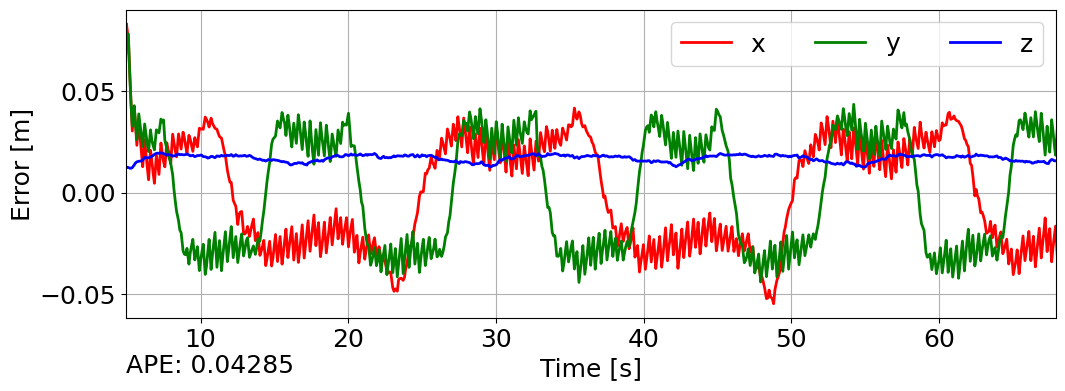

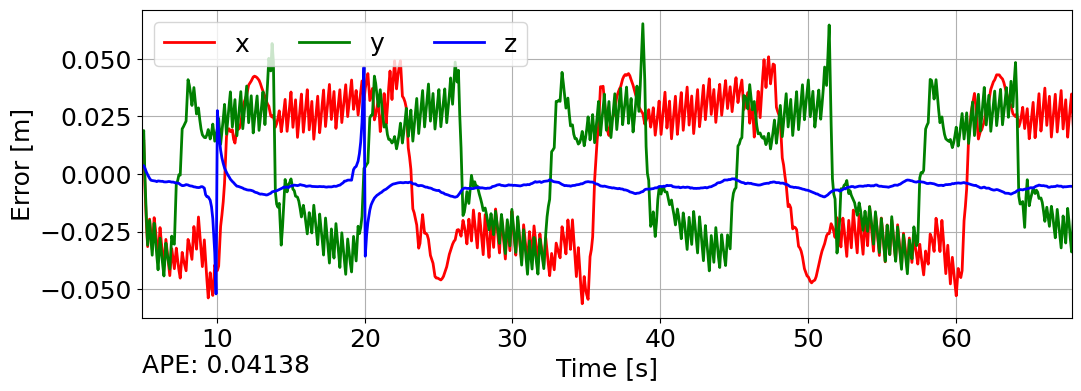

In [87]:
# Load the trajectory
traj_trajlo_data = []
for log in traj_trajlo_logs:
    traj_trajlo_data.append(np.loadtxt(log, delimiter=' ', skiprows=11))

traj_gtr_data = []
for log in traj_gtr_logs:
    traj_gtr_data.append(np.loadtxt(log, delimiter=' ', skiprows=11))

for lidx in range(len(traj_trajlo_data)):
    
    # Get the traj_trajlo
    traj_trajlo = traj_trajlo_data[lidx]
    tidx = list(np.where(traj_trajlo[:, 0] > test_start)[0])
    traj_trajlo = evotraj.PoseTrajectory3D(positions_xyz=traj_trajlo[tidx, :][:, [1, 2, 3]], orientations_quat_wxyz=traj_trajlo[tidx, :][:, [7, 4, 5, 6]], timestamps=traj_trajlo[tidx, 0])

    # Get the traj gtr
    traj_gtr = traj_gtr_data[lidx]
    traj_gtr = evotraj.PoseTrajectory3D(positions_xyz=traj_gtr[:, 0:3], orientations_quat_wxyz=traj_gtr[:, [8, 5, 6, 7]], timestamps=traj_gtr[:, 3])

    traj_trajlo, traj_gtr = sync.associate_trajectories(traj_trajlo, traj_gtr, max_diff=0.2)
    traj_err = evotraj.PoseTrajectory3D(positions_xyz=traj_trajlo.positions_xyz - traj_gtr.positions_xyz, \
                                        orientations_quat_wxyz=traj_trajlo.orientations_quat_wxyz, timestamps=traj_trajlo.timestamps)
    
    # Find the RMSE
    rmse = calculate_metric(traj_trajlo, traj_gtr)
    
    plt.rcParams.update({'font.size':18})
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 0], 'r', linewidth=2, label='x')
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 1], 'g', linewidth=2, label='y')
    ax.plot(traj_err.timestamps, traj_err.positions_xyz[:, 2], 'b', linewidth=2, label='z')

    # Stamp the ATE
    ax.text(0, -0.18, f'APE: {rmse:.5f}', transform=ax.transAxes)

    ax.set_xlim([np.min(traj_trajlo.timestamps), np.max(traj_trajlo.timestamps-1.0)])
    # ax.set_ylim([-0.06, 0.06])
    ax.legend(ncols=3)
    ax.grid('on')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Error [m]')

    